## Polynomial Regression


What if our data is more complex than a straight line. We can still use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features, This technique is called *Polynomial Regression*

In [1]:
import numpy as np

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

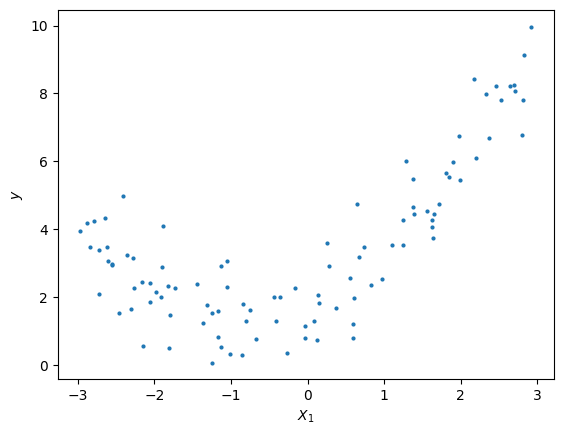

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=4)
plt.ylabel('$y$')
plt.xlabel('$X_1$')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [7]:
X[0]

array([-0.75275929])

In [8]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_poly, y)
lr.intercept_, lr.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Not bad: the models estimates $\hat{y}=0.56x_{1}^{2}+0.93x_{1} +1.78$ when in fact the original function was $y=0.5x_{1}^{2} + 1.0x_{1} +2$ + Gaussian noise

In [10]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lr.predict(X_new_poly)

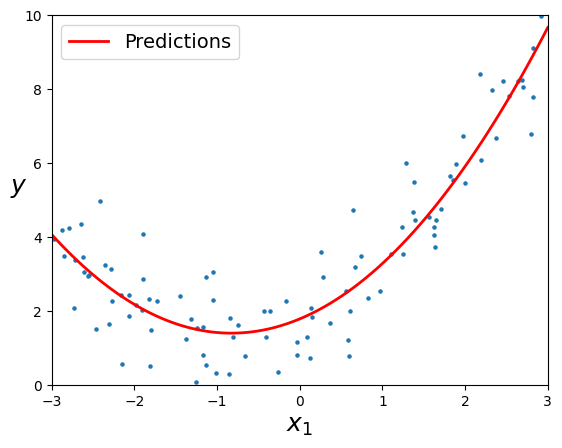

In [11]:
plt.scatter(X, y, s=5)
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

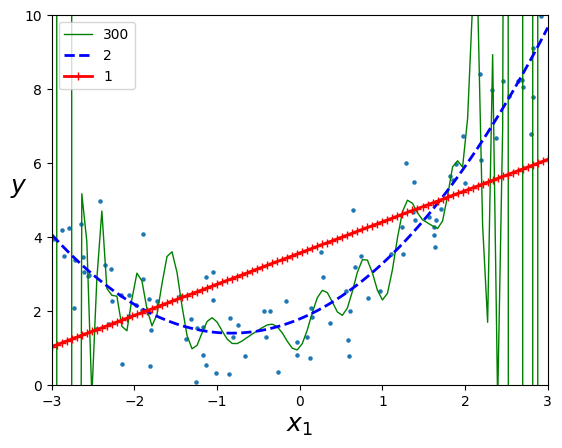

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lines = (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1))

for style, width, degree in lines:
	polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
	std_scaler = StandardScaler()
	lr = LinearRegression()
	polynomial_regression = Pipeline([
		("poly_features", polybig_features),
		("std_scaler", StandardScaler()),
		("lin_reg", LinearRegression())
	])
	polynomial_regression.fit(X, y)
	y_newbig = polynomial_regression.predict(X_new)
	plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y, s=5)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_laerning_curve(model, X, y):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
	train_errors, test_errors = [], []

	for m in range(1, len(X_train)):
		model.fit(X_train[:m], y_train[:m])
		y_train_predict = model.predict(X_train[:m])
		y_test_predict = model.predict(X_test)

		train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
		test_errors.append(mean_squared_error(y_test, y_test_predict))

	plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train")
	plt.plot(np.sqrt(test_errors), 'b-+', linewidth=3, label="test")

	plt.legend(loc="upper right", fontsize=14)
	plt.xlabel("Training set size", fontsize=14)
	plt.ylabel("RMSE", fontsize=14)

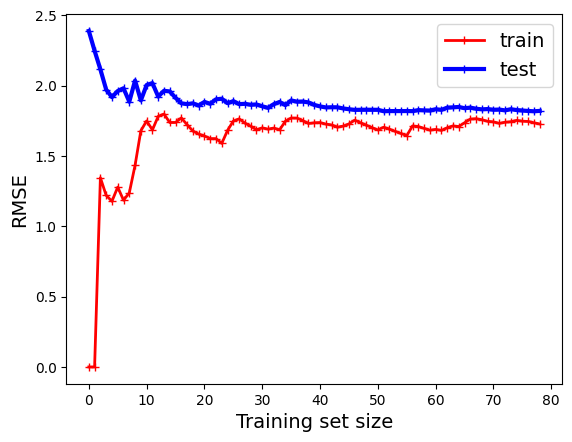

In [28]:
lr = LinearRegression()
plot_laerning_curve(lr, X, y)

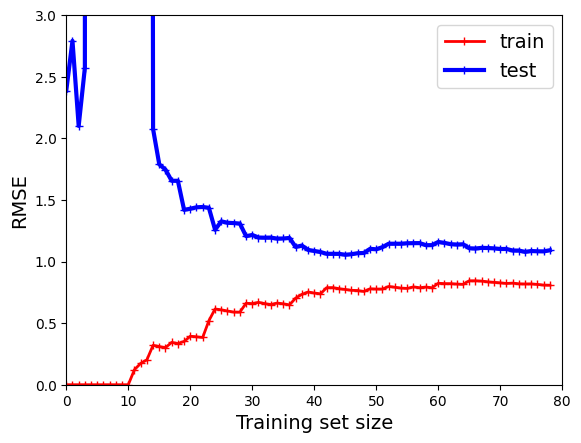

In [43]:
polynomial_regression = Pipeline([
	('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
	('lin_reg', LinearRegression())
])
plot_laerning_curve(polynomial_regression, X,y)
plt.axis([0, 80, 0, 3])
plt.show()

## The Bias/Variance Trade-off

An important theoretical result of statistics and ML is the fact that a model's generalization error can be expressed as the sum of three very different errors:

*Bias*:

	This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it's actually quadratic. A high-bias model is most likely to underfit the training data.

*Variance*:

	This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data

*Irreducible error*:

	This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.


Increasing the model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why its called a trade-off